### **Environment**

In [ ]:
import os
print(os.getcwd())
try:
    os.chdir('../../GlobalTerrorismAnalysis_ETL')
except FileNotFoundError:
    print("""
        Posiblemente ya ejecutaste este bloque dos o más veces o tal vez el directorio está incorrecto. 
        ¿Ya ejecutaste este bloque antes y funcionó? Recuerda no ejecutarlo de nuevo. 
        ¿Estás en el directorio incorrecto? Puedes cambiarlo. 
        Recuerda el directorio donde estás:
        """)
print(os.getcwd())

### **Libraries**

In [2]:
import pandas as pd
from function.database.database import creating_engine, create_table
import matplotlib.pyplot as plt
import seaborn as sns

### **Reading the dataset**

In [3]:
engine = creating_engine()
query = 'SELECT * FROM global_terrorism_db_raw'

In [4]:
df = pd.read_sql_query(query, engine)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,None,0,None,58,Dominican Republic,2,...,None,None,None,None,PGIS,0,0,0,0,None
1,197000000002,1970,0,0,None,0,None,130,Mexico,1,...,None,None,None,None,PGIS,0,1,1,1,None
2,197001000001,1970,1,0,None,0,None,160,Philippines,5,...,None,None,None,None,PGIS,-9,-9,1,1,None
3,197001000002,1970,1,0,None,0,None,78,Greece,8,...,None,None,None,None,PGIS,-9,-9,1,1,None
4,197001000003,1970,1,0,None,0,None,101,Japan,4,...,None,None,None,None,PGIS,-9,-9,1,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310020,2017,12,31,None,0,None,4,Afghanistan,6,...,None,"""4 people injured in Farayb explosion,"" Pajhwo...",None,None,START Primary Collection,-9,-9,0,-9,None
181687,201712310022,2017,12,31,None,0,None,182,Somalia,11,...,None,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,None
181688,201712310030,2017,12,31,None,0,None,160,Philippines,5,...,None,"""Maguindanao clashes trap tribe members,"" Phil...",None,None,START Primary Collection,0,0,0,0,None
181689,201712310031,2017,12,31,None,0,None,92,India,6,...,None,"""Trader escapes grenade attack in Imphal,"" Bus...",None,None,START Primary Collection,-9,-9,0,-9,None


## **EDA raw**

### **Df transformation**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [9]:
columns_choice = [
    "eventid",
    "iyear",
    "imonth",
    "iday",
    "extended",
    "country_txt",
    "country",
    "region_txt",
    "region",
    "city",
    "latitude",
    "longitude",
    "vicinity",
    "crit1",
    "crit2",
    "crit3",
    "doubtterr",
    "multiple",
    "success",
    "suicide",
    "attacktype1_txt",
    "attacktype1",
    "targtype1_txt",
    "targtype1",
    "natlty1_txt",
    "natlty1",
    "gname",
    "guncertain1",
    "individual",
    "nperps",
    "nperpcap",
    "claimed",
    "weaptype1_txt",
    "weaptype1",
    "nkill",
    "property",
    "ishostkid",
    "INT_ANY"
]

In [10]:
df = df[columns_choice]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   imonth           181691 non-null  int64  
 3   iday             181691 non-null  int64  
 4   extended         181691 non-null  int64  
 5   country_txt      181691 non-null  object 
 6   country          181691 non-null  int64  
 7   region_txt       181691 non-null  object 
 8   region           181691 non-null  int64  
 9   city             181256 non-null  object 
 10  latitude         177135 non-null  float64
 11  longitude        177134 non-null  float64
 12  vicinity         181691 non-null  int64  
 13  crit1            181691 non-null  int64  
 14  crit2            181691 non-null  int64  
 15  crit3            181691 non-null  int64  
 16  doubtterr        181690 non-null  floa

In [12]:
df.isnull().sum()

eventid                0
iyear                  0
imonth                 0
iday                   0
extended               0
country_txt            0
country                0
region_txt             0
region                 0
city                 435
latitude            4556
longitude           4557
vicinity               0
crit1                  0
crit2                  0
crit3                  0
doubtterr              1
multiple               1
success                0
suicide                0
attacktype1_txt        0
attacktype1            0
targtype1_txt          0
targtype1              0
natlty1_txt         1559
natlty1             1559
gname                  0
guncertain1          380
individual             0
nperps             71115
nperpcap           69489
claimed            66120
weaptype1_txt          0
weaptype1              0
nkill              10313
property               0
ishostkid            178
INT_ANY                0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.shape

C:\Users\PC\AppData\Local\Temp\ipykernel_10780\2053667463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


(95645, 38)

In [14]:
df.nunique()

eventid            95645
iyear                 47
imonth                12
iday                  32
extended               2
country_txt          168
country              168
region_txt            12
region                12
city               23293
latitude           34518
longitude          34181
vicinity               3
crit1                  2
crit2                  2
crit3                  2
doubtterr              3
multiple               2
success                2
suicide                2
attacktype1_txt        9
attacktype1            9
targtype1_txt         22
targtype1             22
natlty1_txt          183
natlty1              183
gname               1365
guncertain1            2
individual             2
nperps                88
nperpcap              46
claimed                3
weaptype1_txt         12
weaptype1             12
nkill                169
property               3
ishostkid              3
INT_ANY                3
dtype: int64

Se tiene que inspeccionar la columna iday, ya que tiene 32 datos, lo que puede significar que hay un rango posible de días que se sale del rango de días normales: 1-31 

In [15]:
for i in df['iday']:
    if i>31 or i<1:
        print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Podemos observar que el valor atipico es el día 0, por lo que procedemos a eliminar el 0 de los registros

In [16]:
df = df[df['iday'] != 0]
df.nunique()

eventid            95421
iyear                 47
imonth                12
iday                  31
extended               2
country_txt          168
country              168
region_txt            12
region                12
city               23225
latitude           34434
longitude          34101
vicinity               3
crit1                  2
crit2                  2
crit3                  2
doubtterr              3
multiple               2
success                2
suicide                2
attacktype1_txt        9
attacktype1            9
targtype1_txt         22
targtype1             22
natlty1_txt          183
natlty1              183
gname               1360
guncertain1            2
individual             2
nperps                88
nperpcap              46
claimed                3
weaptype1_txt         12
weaptype1             12
nkill                169
property               3
ishostkid              3
INT_ANY                3
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df = df[df['doubtterr'] != 0]
df = df[df['doubtterr'] != -9]
df['doubtterr'].head()

7     1.0
11    1.0
14    1.0
31    1.0
35    1.0
Name: doubtterr, dtype: float64

Se debe realizar lo anterior, ya que solo queremos indagar sobre los atentados que esten 100% seguros de que son terroristas

In [22]:
df.shape

(15086, 38)

In [23]:
# Características del ataque
feature_attack_part_1 = [
    'attacktype1',
    'targtype1',
    'weaptype1',
    'success',
    'crit1',
    'crit2',
    'crit3',
    'multiple'
]

feature_attack_part_2 = [
    'guncertain1',
    'individual',
    'claimed',
    'INT_ANY',
    'extended',
    'vicinity',
    'natlty1'
]

# Consecuencias del ataque
attack_consequences = [
    'nkill',
    'property',
    'ishostkid',
    'suicide',
    'nperps',
    'nperpcap'
]

Lo anterior es para incluir columnas separadas y realizar gráficos más eficientes dependiendo del contexto

### **Charts**

#### **Time Chart**

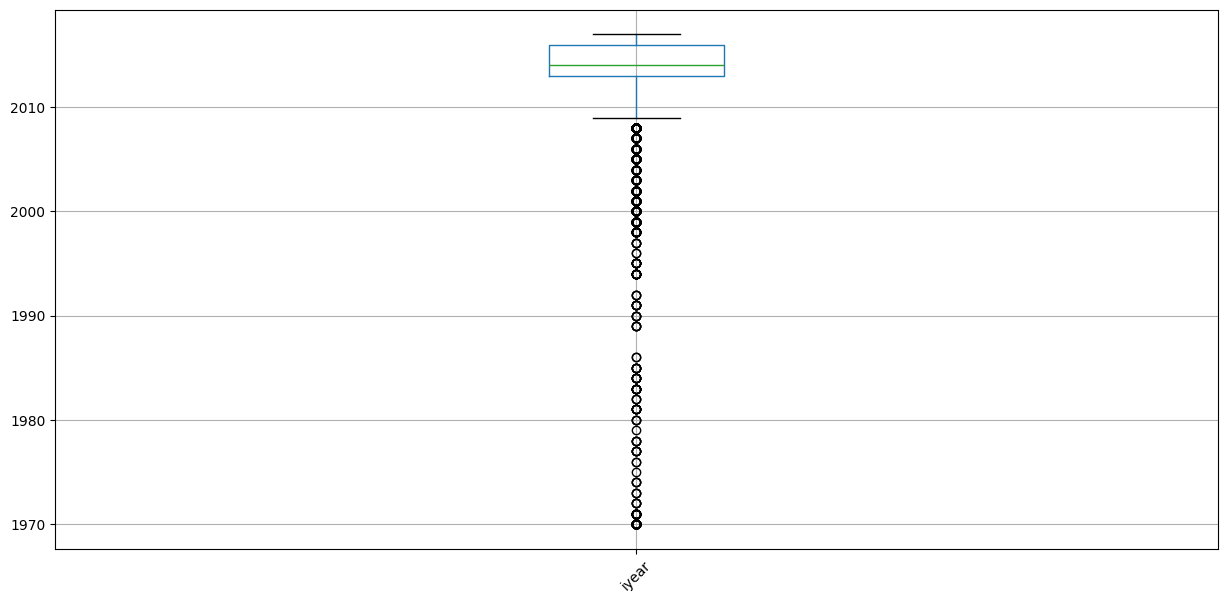

In [24]:
fig = plt.figure(figsize=(15, 7))
boxplot = df.boxplot(column='iyear', rot=45)
plt.show()

#### **Feature Attacks Charts**

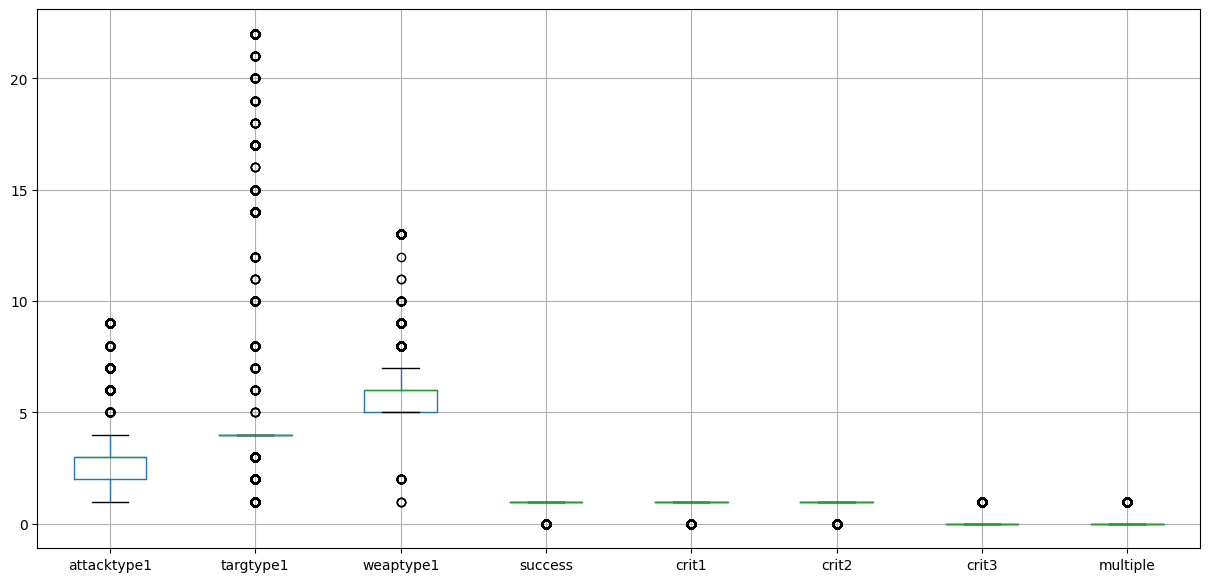

In [25]:
# Crear un boxplot de las columnas seleccionadas
fig = plt.figure(figsize=(15, 7))
boxplot = df.boxplot(column=feature_attack_part_1)
plt.show()

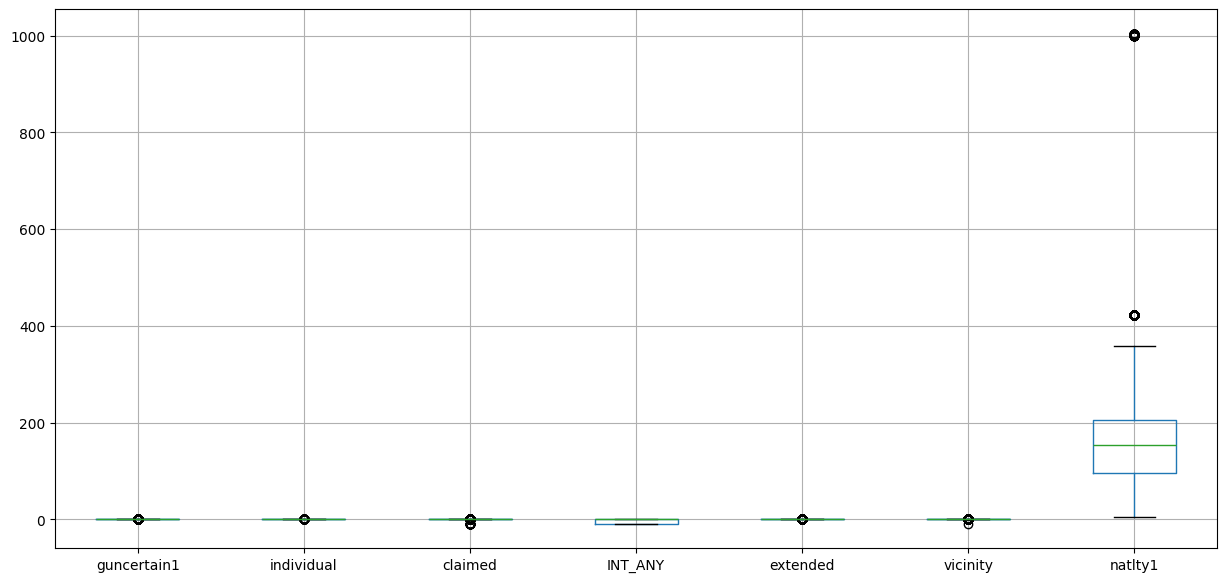

In [26]:
# Crear un boxplot de las columnas seleccionadas
fig = plt.figure(figsize=(15, 7))
boxplot = df.boxplot(column=feature_attack_part_2)
plt.show()

In [27]:
df['claimed'].unique()

array([ 0.,  1., -9.])

El -9 de la columna claimed puede significar que se desconoce si el autor reclamó la responsabilidad del ataque. Podemos observar también valores cercanos al 100 en natlty1, y es porque 999 significa "desconocido" en la mayoría de contextos que se le de, en este caso, en la nacionalidad del objetivo, que significa que la nacionalidad del objetivo es desconocida. Por lo cuál no debemos intervenir estos valores atípicos.

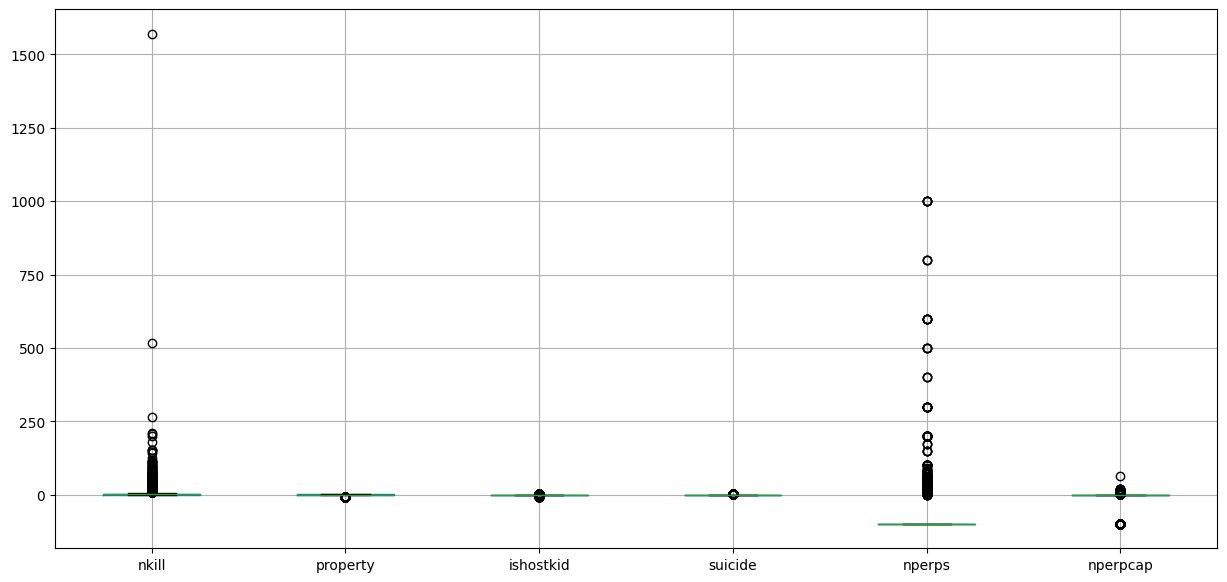

In [28]:
# Crear un boxplot de las columnas seleccionadas
fig = plt.figure(figsize=(15, 7))
boxplot = df.boxplot(column=attack_consequences)
plt.show()

Los valores atipicos en algunas columnas son necesarios, pues poseen diferentes contextos y variables que nos pueden ayudar a ver casos de terrorismos excepcionales

#### **Con lo anterior podemos definir una limpieza efectiva**

## **Df Load**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15086 entries, 7 to 181687
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eventid          15086 non-null  int64  
 1   iyear            15086 non-null  int64  
 2   imonth           15086 non-null  int64  
 3   iday             15086 non-null  int64  
 4   extended         15086 non-null  int64  
 5   country_txt      15086 non-null  object 
 6   country          15086 non-null  int64  
 7   region_txt       15086 non-null  object 
 8   region           15086 non-null  int64  
 9   city             15086 non-null  object 
 10  latitude         15086 non-null  float64
 11  longitude        15086 non-null  float64
 12  vicinity         15086 non-null  int64  
 13  crit1            15086 non-null  int64  
 14  crit2            15086 non-null  int64  
 15  crit3            15086 non-null  int64  
 16  doubtterr        15086 non-null  float64
 17  multiple        

In [30]:
create_table(engine, df, 'global_terrorism_db_cleaned')

## **Check**

In [31]:
query = 'SELECT * FROM global_terrorism_db_cleaned'

In [32]:
df_cleaned = pd.read_sql_query(query, engine)
df_cleaned

,eventid,iyear,imonth,iday,extended,country_txt,country,region_txt,region,city,...,individual,nperps,nperpcap,claimed,weaptype1_txt,weaptype1,nkill,property,ishostkid,INT_ANY
0,197001020002,1970,1,2,0,United States,217,North America,1,Oakland,...,0,-99.0,-99.0,0.0,Explosives,6,0.0,1,0.0,-9
1,197001060001,1970,1,6,0,United States,217,North America,1,Denver,...,0,-99.0,-99.0,0.0,Incendiary,8,0.0,1,0.0,-9
2,197001090002,1970,1,9,0,United States,217,North America,1,Rio Piedras,...,0,-99.0,-99.0,1.0,Incendiary,8,0.0,1,0.0,0
3,197001250001,1970,1,25,0,United States,217,North America,1,West Point,...,0,-99.0,-99.0,0.0,Incendiary,8,0.0,1,0.0,-9
4,197001280002,1970,1,28,0,United States,217,North America,1,Seattle,...,0,-99.0,-99.0,0.0,Explosives,6,0.0,1,0.0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15081,201712310007,2017,12,31,0,Iraq,95,Middle East & North Africa,10,Baaj,...,0,-99.0,0.0,0.0,Unknown,13,5.0,0,0.0,1
15082,201712310012,2017,12,31,0,Iraq,95,Middle East & North Africa,10,Muqdadiyah,...,0,-99.0,0.0,0.0,Firearms,5,13.0,0,0.0,1
15083,201712310013,2017,12,31,0,Somalia,182,Sub-Saharan Africa,11,Wajid,...,0,-99.0,0.0,0.0,Explosives,6,0.0,-9,0.0,1
15084,201712310029,2017,12,31,0,Syria,200,Middle East & North Africa,10,Jableh,...,0,-99.0,0.0,0.0,Explosives,6,2.0,1,0.0,1


## **EDA cleaned - Multivariate Analysis**

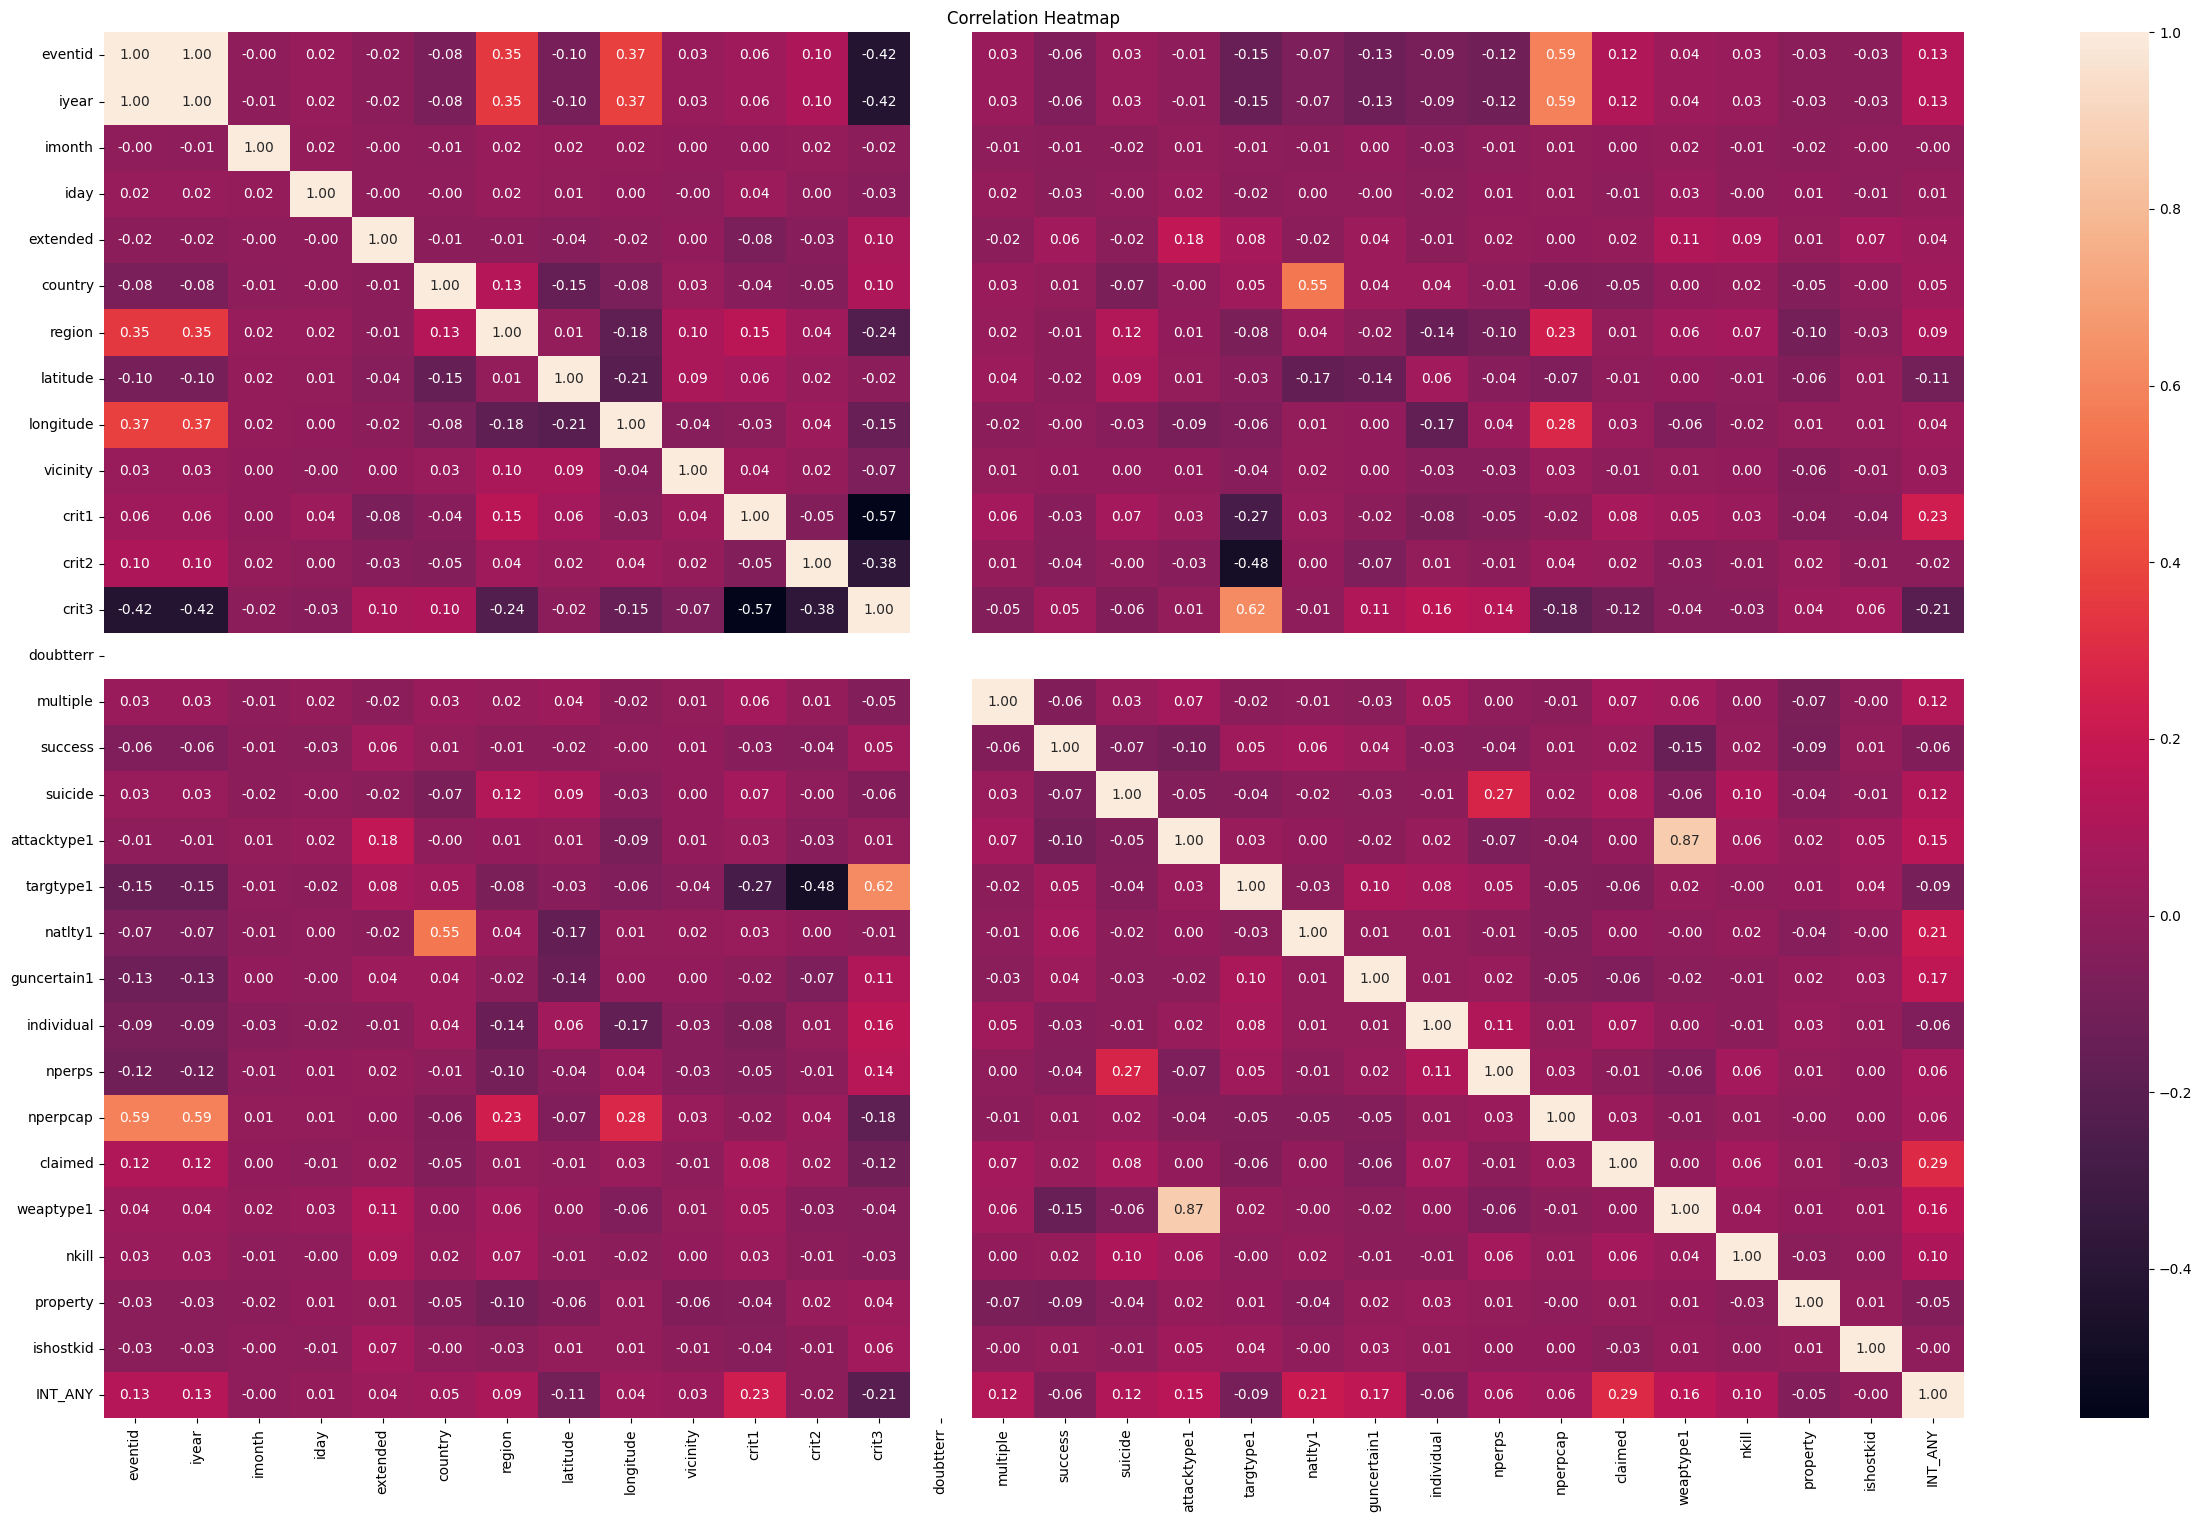

In [33]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(30, 18))

# Using Seaborn to create a heatmap
sns.heatmap(df_cleaned.select_dtypes(include=['int', 'float']).corr(), fmt='.2f', annot=True)

plt.title('Correlation Heatmap')
plt.show()

* Existe una correlación no tan fuerte entre la nacionalidad de la victima y el país donde ocurrió el atentado. Sin embargo, es algo raro que la correlación no sea notable, lo que puede significar que en algunos (¿cuántos?) casos se realizan atentados contra una nacionalidad en especifico y no contra el país.

* Existe una correlación no tan fuerte entre los años y las capturas a los autores del atentado, lo que puede ser un indicio de posibles periodos donde más se cometen actos terroristas

* Existe una correlación un poco fuerte entre una población objetivo y atentados de tipo "FUERA DEL DERECHO INTERNACIONAL HUMANITARIO" (crit3), lo que podría ser indicio de que es posible que una población en especifico reciban fuertes atentados.

* Existe una fuerte relación entre attacktype1 y weaptype1, que a pesar de ser un poco lógica (pues, si hay attacktype: bomb, el weaptype puede ser granadas, etc), puede detallarnos en algunos casos que tipo de armas se utilizan más para el tipo de ataque

* La correlaciones negativas entre crit1, crit2 y crit3, son lógicas, pues si alguna de los dos no es 1, por lo menos 1 lo será (describiendo los motivos del atentado)